# Análise de Dados em Python: Visualização de Dados

2023/24 -- João Pedro Neto, DI/FCUL

A recolha e a análise de dados é uma tarefa universal na prática científica. É comum acontecer termos uma tão grande quantidade de dados que nos vemos obrigados a criar resumos para nos ajudar a perceber padrões ou tendências que os dados possuam, dando-nos pistas para posterior investigação.

Uma forma muito comum de o fazer é através da **visualização de dados**: o uso combinado de elementos gráficos (pontos, linhas, cores, etc.) que nos facilita a tarefa de encontrar esses padrões, dado que para um ser humano é muito mais fácil interpretar relações gráficas do que olhar para as respetivas tabelas de números em bruto ou até de estatísticas.

Um exemplo clássico da importância da visualização é o **quarteto de Anscombe** que nos dá quatro _datasets_ cujas estatísticas comuns são todas iguais -- média ($\mu$), desvio padrão ($\sigma$), coeficiente de correlação ($r$) e linha de regressão, mas cujos valores representam conjuntos de dados completamente diversos:

In [ ]:
x1 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

x2 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]

x3 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]

x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

Se desenharmos os respetivos gráficos e estatísticas obtemos estes resultados:

<center><img src='https://raw.githubusercontent.com/jpneto/Prog.I/master/imgs/anscombe_quartet.jpg' width=450px></center>

<!-- ref: https://matplotlib.org/stable/gallery/specialty_plots/anscombe.html -->

A moral deste exemplo é que se consideramos no nosso raciocínio apenas estatísticas sobre os dados, podemos retirar deles conclusões erradas.

Dada a importância de visualizar dados, vamos apresentar uma forma de os desenhar em Python.

## Módulo `matplotlib`

O `matplotlib` é um módulo Python concebido para ser uma ferramenta de visualização de dados. O ecossistema de módulo Python é enorme. Existem muitos pacotes de visualização, alguns mais especializados em certas áreas, mas o `matplotlib` é ainda o módulo de visualização mais usado pelos programadores Python.

Esta capítulo procura, a partir de vários exemplos, desenvolver a intuição de como usar o API deste módulo.

No nosso caso, o uso das suas funcionalidades será via um sub-módulo designado `pyplot`. Para importá-lo:

In [ ]:
import matplotlib.pyplot as plt

A função principal que iremos usar é `subplots`. A invocação terá esta estrutura:

      fig, ax = plt.subplots()

`subplots` devolve dois objetos:

+  `fig` representa todo o gráfico que queremos produzir,

+ `ax` representa os elementos estéticos (etiquetas, cores, formas, etc.) dos gráficos.

A figura pode ter múltiplos gráficos (como veremos) e cada um tem os seus próprios elementos estéticos.

Veremos neste _notebook_ algumas das muitas opções que o `matplotlib` disponibiliza.


---

Comecemos por um exemplo muito direto. Queremos visualizar as funções seno e co-seno. Para visualizar o gráfico de uma função $f$, podemos gerar e visualizar uma série de valores $(x,f(x))$.

Para gerar os dados:



In [ ]:
from math import sin, cos

xs = [0.1*x for x in range(100)] # criar 100 valores espaçados entre [0,10]
ys_sin = [sin(x) for x in xs]
ys_cos = [cos(x) for x in xs]

E para os visualizar utilizamos a função `show`:

In [ ]:
fig, ax = plt.subplots(figsize=(8,4)) # figsize define o tamanho dos plots

ax.plot(xs, ys_sin)
ax.plot(xs, ys_cos)
plt.show()            # informa o pyplot para desenhar o gráfico

Cada instrução que pedimos ao `pyplot` vai acumulando no gráfico final. Só quando executamos a função `show` é que observamos o resultado final.

> No contexto dos _notebooks_ Jupyter/Colab, se chegarmos ao fim da caixa de código, o Python apresenta o gráfico, mesmo que não haja uma invocação explícita da função `show`. Neste caso, coloque um `;` na última instrução para não aparecer um _print_ do objeto gráfico (vamos usar esta notação a partir de agora pela simples razão de sermos preguiçosos 😅).

Se pretendemos desenhar os gráficos em janelas separadas, temos de pedir ao `subplots` dois objetos `Axes`.

Um exemplo:

In [ ]:
fig, ax = plt.subplots(figsize=(8,6), nrows=2) # dois plots em linhas diferentes

ax[0].plot(xs, ys_sin)
ax[1].plot(xs, ys_cos);

Ou lado a lado:

In [ ]:
fig, ax = plt.subplots(figsize=(12,4), ncols=2)

ax[0].plot(xs, ys_sin)
ax[1].plot(xs, ys_cos);

O módulo fornece um grande controle ao utilizador para decidir onde colocar cada um dos gráficos:

In [ ]:
ax1 = plt.axes()                         # pedir um objeto Axes default
ax2 = plt.axes([0.15, 0.15, 0.25, 0.15]) # pedir um 2º Axes com localização [%x0, %y0, dx, dy]

ax1.plot(ys_sin)
ax2.plot(ys_cos)
ax2.axes.xaxis.set_ticklabels([]) # remover valores dos eixos no gráfico interior
ax2.axes.yaxis.set_ticklabels([]);

### Ajustar elementos gráficos

É possível alterar os elementos estéticos dos objetos `Axes`, de forma a individualizar o resultado final às nossas necessidades. Alguns exemplos.

Mudar a cor da linha:

In [ ]:
fig, ax = plt.subplots(figsize=(9,3), ncols=2)

ax[0].plot(xs, ys_sin, color='orange')   # cf. https://matplotlib.org/stable/gallery/color/named_colors.html
ax[1].plot(xs, ys_cos, color='#9933FF'); # cf. https://htmlcolorcodes.com

Mudar o estilo da linha:

In [ ]:
fig, ax = plt.subplots(figsize=(13,3), ncols=3)

ax[0].plot(xs, ys_sin, linestyle='--')
ax[1].plot(xs, ys_sin, linestyle='-.');
ax[2].plot(xs, ys_sin, linestyle=':');

Definir os limites dos eixos:

In [ ]:
fig, ax = plt.subplots(figsize=(9,3), ncols=2)
for i in range(2):
  ax[i].set_xlim(-1, 11)
  ax[i].set_ylim(-2, 2)

ax[0].plot(xs, ys_sin, color='orange')
ax[1].plot(xs, ys_cos, color='#9933FF');

Podemos acrescentar etiquetas, como títulos ou legendar os eixos:

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))

ax.set_title('Mapa da função seno')
ax.set_xlabel('$x$')
ax.set_ylabel('$\sin x$') # pode-se usar latex 🥰
ax.plot(xs, ys_sin);

Ou inserir legendas:

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(xs, ys_sin, label='$\sin x$')
ax.plot(xs, ys_cos, label='$\cos x$')
ax.legend();

## Tipos de Gráficos

### O scatter plot

Um _scatter plot_ é um diagrama onde mostramos os pares $(x,y)$ como pontos a duas dimensões num plano cartesiano. Se pretendemos incluir mais informação, este pode ser mapeada em elementos estéticos relativos ao ponto, nomeadamente, o seu tamanho, a sua forma, e a sua cor.

Um _scatter plot_ pode ser usado para representar uma variável $y$ dependente de outra $x$ (como no caso acima das funções), ou representar a relação de duas variáveis independentes $x_1, x_2$.

A função `plot` pode ser usada aqui. para além de passar os dados, temos de informar a forma do ponto:

In [ ]:
x1 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x1, y1, 'D', markersize=5, color='indigo'); # experimentar trocar 'D' por um destes: 'o.x+*dsv^><'

É muito típico querer incluir a linha de regressão das duas variáveis:

In [ ]:
import numpy as np

regressao = np.poly1d( np.polyfit(x1, y1, deg=1) ) # calcula linha de regressão

fig, ax = plt.subplots(figsize=(6,4))

ax.plot(x1, y1, 'D', markersize=5, color='indigo')
ax.plot(x1, regressao(x1), linestyle='-', color='orange');

Existe uma função especializada, `scatter` que permite uma maior personalização dos dados: podemos definir o formato de cada um dos pontos do gráfico.

In [ ]:
from random import randint
colors = np.random.randint(  1,   20, len(x1))  # gerar valores aleatórios para cores e tamanhos
sizes  = np.random.randint(100, 1000, len(x1))

fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(x1, y1, c=colors, s=sizes, cmap='Greens'); # https://matplotlib.org/stable/tutorials/colors/colormaps.html

No exemplo seguinte vamos usar um _dataset_ conhecido por `iris` com informação sobre três categorias de flores. Este _dataset_ é composto por quatro medidas diferentes para 150 flores, e uma coluna final que informa de que categoria de flor se trata.

In [ ]:
# não interessa perceber esta parte do código, dado ser
# um API de um módulo Python que não vamos estudar aqui
from sklearn.datasets import load_iris

iris = load_iris()
medicoes = iris.data.T

print(medicoes[:,:12])    # as quatro medições das primeiras 12 flores
print(iris.feature_names) # os nomes dessas medições
print(iris.target_names)  # os nomes das categorias

Gostaríamos de visualizar estes dados num gráfico (olhar para uma tabela com muitos números faz mal à vista 😵).

Nos eixos x e y podemos representar as duas primeiras medições, usando a cor dos pontos para informar a categoria (`iris.target`):

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(medicoes[0], medicoes[1], c=iris.target, cmap='tab20');

Mas podemos fazer melhor. De acordo com a estrutura do _dataset_, a terceira medição é o comprimento da pétala. Podemos indicar isso através do tamanho dos pontos.

Vamos também incluir uma legenda, para o leitor poder destinguir as categorias. Para tal, temos de fazer um _scatterplot_ separado para cada categoria.

In [ ]:
fig, ax = plt.subplots(figsize=(9,6))
colors = ['red', 'green', 'blue']

for i in range(3):                 # para cada categoria i,
  x  = medicoes[0][iris.target==i] #  guardar apenas as medições das flores
  y  = medicoes[1][iris.target==i] #  dessa categoria
  sz = medicoes[2][iris.target==i]
  ax.scatter(x, y, label=iris.target_names[i], marker='o',
             c=colors[i], s=sz*40, alpha=.5) # 0<alpha<1 dá transparência

ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.legend(frameon=False, title='flor');

Desta forma incluímos quatro informações diferentes, para cada flor do _dataset_, no mesmo gráfico.

Um gráfico não é apenas para ser visto. Ele deve ser 'lido' e analisado. Existem vários padrões interessantes na disposição destas flores. Observamos, por exemplo, que as flores setosa distinguem-se muito melhor que as restantes, em qualquer das três medidas visualizadas. Este tipo de gráfico dá-nos pistas se quisermos implementar um sistema que nos permita classificar novas flores ainda não catalogadas.

### Histogramas

Quando temos um conjunto de valores numéricos e os queremos organizar por intervalos, podemos usar **histogramas** para os visualizar. Estes intervalos designam-se _bins_ ou _buckets_ e é um valor que podemos determinar. Quanto maior o número de _bins_ mais exposto será o resultado ao ruído dos dados.

Um histograma pode ser usado para nos dar uma aproximação da distribuição que (assumimos) gera uma ou mais medições.

In [ ]:
data = np.random.normal(0,1,10_000) # geral 10k valores da distribuição normal(0,1)

fig, ax = plt.subplots(figsize=(18,5), ncols=2)

ax[0].set_xlim(-3.5,3.5)
ax[0].set_title('Distribuição empírica de uma amostra normal')
ax[0].hist(data, bins=25, color='darkblue', edgecolor='white');

ax[1].set_xlim(-3.5,3.5)
ax[1].set_title('Com maior número de bins ficamos mais expostos ao ruído da medição')
ax[1].hist(data, bins=100, color='darkblue', edgecolor='white');

Se tivermos vários grupos de valores numéricos, e os quisermos comparar, podemos dispor vários histogramas no mesmo gráfico:


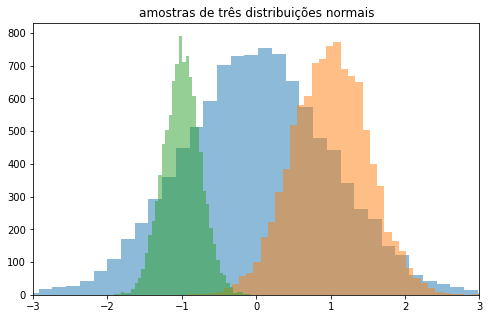

In [ ]:
n = 10_000
data = [np.random.normal(0,1,n), np.random.normal(1,.5,n), np.random.normal(-1,.25,n)]

fig, ax = plt.subplots(figsize=(8,5))

for i in range(3):
  ax.hist(data[i], alpha=0.5, bins=40)  # alpha é o grau de transparência
ax.set_title('amostras de três distribuições normais')
ax.set_xlim(-3,3);

### Gráficos de Barras

Um outro gráfico, visualmente similar ao histograma, é o **gráfico de barras**. Mas enquanto o histograma agrupa números por intervalos, o gráfico de barras representa quantidades de valores por categorias discretas.

In [ ]:
grades = [str(i) for i in range(1,21)]
count  = [0,0,0,1,2,0,6,5,3,12,11,6,7,12,8,7,11,6,2,1]

fig, ax = plt.subplots(figsize=(12,5))

ax.bar(grades, count, align='center')
ax.set_xlabel('nota final')
ax.set_ylabel('número de alunos')
ax.set_title('Notas de Programação');

E claro, podemos dispor várias categorias, lado a lado:

In [ ]:
grades = np.array([i for i in range(1,21)])
progr = [1,0,0,1,2,0,6,5,3,12,11,6,7,12,8,7,11,6,2,1]
mat   = [3,2,3,5,1,4,7,9,7,11,14,3,12,8,5,3,8,10,0,0]

fig, ax = plt.subplots(figsize=(12,5))
bar_width = 0.4

ax.bar(grades - bar_width/2, progr, bar_width, align='center', label='programação', color='orange')
ax.bar(grades + bar_width/2, mat,   bar_width, align='center', label='matemática',  color='green')
ax.set_xticks(grades)
ax.set_title('Notas')
ax.set_xlabel('nota final')
ax.set_ylabel('número de alunos')
ax.legend();

### Gráficos de Setores

Podemos também usar os conhecidos gráficos de setor (ou gráficos de _pizza_), apesar de normalmente não serem a melhor opção para representar dados. Por exemplo, para comparar categorias temos de comparar ângulos, o que nem sempre é fácil de fazer (obrigando-nos a incluir valores de percentagens):

In [ ]:
categorias = ['Não', 'Sim', 'Às vezes']
tamanho = [40, 9, 10]
explode = [0, 0.1, 0]

fig, ax = plt.subplots(figsize=(4,4))

ax.set_title('Será este tipo de gráfico a melhor opção?');
ax.pie(tamanho, explode, categorias, autopct='%.2f%%')

plt.show()

### Posicionamento de Texto

É possível incluir texto extra dentro de um gráfico. Esta funcionalidade é útil para adicionar informação importante para salientar certos valores.

Vamos criar uma lista de valores aleatório similar aos preços diários de uma ação bolsista:

In [ ]:
import random as rnd

def randomWalk():
  passeio = 0
  while True:
    passeio = passeio + rnd.choice([-1,1])
    yield passeio

n, gen = 500, randomWalk()
data = [next(gen) for _ in range(n)]           # gerar n valores
max_idx, max_x = np.argmax(data), np.max(data) # encontrar o ponto máximo
min_idx, min_x = np.argmin(data), np.min(data) # encontrar o ponto mínimo

Agora vamos visualizar os dados, e indicar textualmente o máximo e o mínimo dentro do gráfico.

No exemplo seguinte podem observar dois tipos de texto:

+ `ax.text` coloca uma _string_ num ponto `(x,y)` .

+ `ax.annotate` é similar mas junta uma seta para indicar o local a que o texto se refere.

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))

ax.plot(range(n), data, '-')
ax.set_ylim(np.min(data)-5, np.max(data)+5)
ax.text(max_idx, max_x+1, 'máximo', size=10, color='green', ha='center')
ax.plot([max_idx], [max_x], 'd', color='orange')
ax.annotate('mínimo', (min_idx,min_x), xytext=(min_idx+25,min_x-1),
            arrowprops=dict(facecolor='black', width=1, headwidth=8));

### Visualizar Incerteza

As medições científicas estão regularmente associadas a margens de erro. A função `errorbar` permite incluir barras de erro aos respetivos valores numéricos.

In [ ]:
n = 50
x = np.linspace(0,10,n)
erro = np.random.normal(0,.2,n)  # randn ~ normal(0,1)
y = np.sin(x) + erro

fig, ax = plt.subplots(figsize=(12,7))

ax.errorbar(x, y, yerr=erro, fmt='.', color='blue', capsize=3);

Outro gráfico muito usado para comparar médias, variâncias e distorção (_skewness_) entre grupos de valores é o **box-plot**:

In [ ]:
n = 1000
data = [np.random.normal(0,1.2,n), np.random.normal(1,.75,n), np.random.normal(-1,.8,n)]

fig, ax = plt.subplots(figsize=(7,5))

ax.boxplot(data, notch=True, positions=[1,3,7], widths=1.5, labels=['A1','A2','B']);

### 3D

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig, ax = plt.subplots(figsize=(8,5))
ax = Axes3D(fig)

x, y = np.meshgrid(np.arange(-2, 2, 0.2), np.arange(-2, 2, 0.2))
z = -x**2 + y**3

ax.view_init(45, 15)
ax.plot_surface(x, y, z);

In [ ]:
plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline)
ax.view_init(30, 15)

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

## Exercícios

O seguinte código carrega outro _dataset_ disponível. Este descreve medições efetuadas em 178 vinhos. Há 13 medições diferentes, desde nível de álcool, cor, níveis de magnésio, etc. Os vinhos são divididos em três categorias:

In [ ]:
from sklearn.datasets import load_wine

wine = load_wine()
medicoes = wine.data.T # 13 medições para cada um de 178 vinhos

print(wine.feature_names) # os nomes dessas medições
print(wine.target_names)  # há três classes

Pretendemos fazer uma prática de **visualização exploratória**, ou seja, dado um _dataset_, elaborar uma série de gráficos que exploram potenciais relações entre diferentes medidas e as suas respetivas categorias. Estes gráficos são muitas vezes úteis aos investigadores porque indicar caminhos promissores para um estudo mais aprofundado.

O objetivo é reproduzir as imagens abaixo usando as funcionalidades do `matplotlib`.

<center><img src='https://raw.githubusercontent.com/jpneto/Prog.I/master/imgs/ex1_wine.png' width=500px></center>

In [ ]:
#@title
alcohol = []
for i in range(3):
  alcohol.append(medicoes[0][wine.target==i])
alcohol = np.array(alcohol, dtype=object) # remove um warning

fig, ax = plt.subplots(figsize=(7,5))

ax.set_title('Nível de álcool por categoria de vinho')
ax.boxplot(alcohol, notch=True, positions=[1,3,5], widths=1.5, labels=['C0','C1','C2']);

<center><img src='https://raw.githubusercontent.com/jpneto/Prog.I/master/imgs/ex2_wine.png' width=500px></center>

In [ ]:
#@title
fig, ax = plt.subplots(figsize=(8,5))

for i in range(3):
  ax.hist(alcohol[i], bins=10, alpha=0.75, label=f'class{i}')
ax.set_title('Nível de álcool por categoria de vinho')
ax.legend();

<center><img src='https://raw.githubusercontent.com/jpneto/Prog.I/master/imgs/ex3_wine.png' width=750px></center>

In [ ]:
#@title
fig, ax = plt.subplots(figsize=(12,5), ncols=2)

ax[0].set_title(wine.feature_names[9])
ax[0].hist(medicoes[9], bins=15, color='darkblue', edgecolor='white')

ax[1].set_title(wine.feature_names[10])
ax[1].hist(medicoes[10], bins=15, color='darkblue', edgecolor='white');

<center><img src='https://raw.githubusercontent.com/jpneto/Prog.I/master/imgs/ex4_wine.png' width=400px></center>

In [ ]:
#@title
fig, ax = plt.subplots(figsize=(6,6))
colors = ['red', 'green', 'blue']
shape = 'oxd'

for i in range(3):                 # para cada categoria i,
  x  = medicoes[0][wine.target==i] #  alcool
  y  = medicoes[4][wine.target==i] #  magnesio
  ax.scatter(x, y, marker=shape[i], label=wine.target_names[i],
             c=colors[i], s=40, alpha=.5) # 0<alpha<1 dá transparência

ax.set_xlabel(wine.feature_names[0])
ax.set_ylabel(wine.feature_names[4])
ax.legend();
fig.savefig('ex4_wine.png')

## Referências

+ Jake VanderPlas - [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)

+ J.R. Johansson - [matplotlib - 2D and 3D plotting in Python](https://github.com/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb)

+ [Exemplos da página do `matplotlib`](https://matplotlib.org/stable/gallery/index)
